In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(
                            host = host,
                            user = user,
                            password = pwd,
                            dbname = db)


# Q1

In [4]:
sql = "select * from student"

In [5]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_7555/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,IA


# Q2

In [13]:
sql = """select professor.p_name,
	   course.c_name
from professor
inner join course
on professor.p_email = course.p_email"""

In [14]:
df = pandas.read_sql_query(sql,conn)
df[:]

/tmp/ipykernel_7555/831397919.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


# Q3

In [20]:
sql = """select c_number, count(*) as num_students
from enroll
group by c_number
order by num_students desc"""

/tmp/ipykernel_7555/2360037408.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='c_number'>

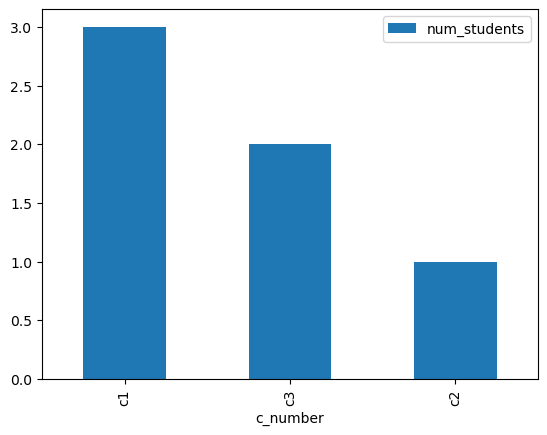

In [21]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(y= 'num_students', x='c_number')

# Q4

In [22]:
sql = """select professor.p_name, count(course.c_number) as num_courses_taught
from professor
inner join course on professor.p_email = course.p_email
group by professor.p_name
order by num_courses_taught desc"""

/tmp/ipykernel_7555/3104779382.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query(sql,conn)


<Axes: xlabel='p_name'>

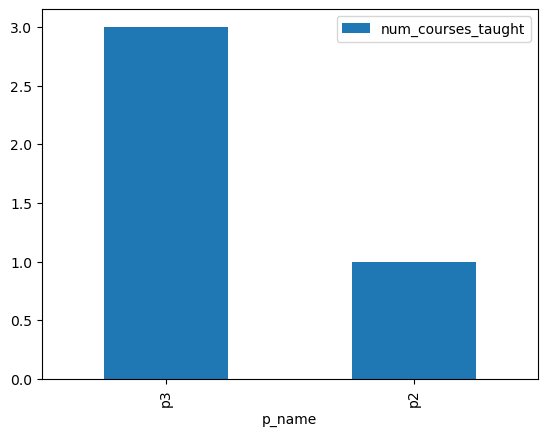

In [23]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(y= 'num_courses_taught', x='p_name')

# Q5

In [51]:
cur = conn.cursor()

In [58]:
sql = """insert into professor(p_email,p_name,office)
         values('p4@jmu.edu','p4','o4')"""



In [53]:
cur.execute(sql)
conn.commit() ##error due to information previously modified. Code would work in intial circumstance

UniqueViolation: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(p4@jmu.edu) already exists.


In [55]:
df = pandas.read_sql_query('select * from professor',conn)
df[:]

/tmp/ipykernel_7555/2361312252.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from professor',conn)


,p_email,p_name,office
0,p2@jmu.edu,p2,02
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [77]:
sql = """insert into course(c_number,c_name,room, p_email)
         values('c5','linkedin','r2','p4@jmu.edu')"""


In [79]:
cur.execute(sql)

In [80]:
df = pandas.read_sql_query('select * from course',conn)
df[:]

/tmp/ipykernel_7555/2981575292.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql_query('select * from course',conn)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu
